# Data Visualization Assignment

Visualizing population data from the Gapminder dataset using matplotlib and seaborn for Brazil, France, Japan, Kenya, and United States.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Define file paths
file_paths = {
    'Brazil': 'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-bra--age--gender--year.csv',
    'France': 'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-fra--age--gender--year.csv',
    'Japan': 'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-jpn--age--gender--year.csv',
    'Kenya': 'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-ken--age--gender--year.csv',
    'USA': 'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-usa--age--gender--year.csv'
}

# Load data into a dictionary of DataFrames
data = {country: pd.read_csv(path) for country, path in file_paths.items()}


## Part 1: Matplotlib Visualizations

### 1.1 Line Plot - Total population over time

This plot shows the total population over time for Brazil, France, Japan, Kenya, and United States.

In [18]:
# Calculate total population per year for each country
yearly_totals = {country: df.groupby('year')['population'].sum() for country, df in data.items()}

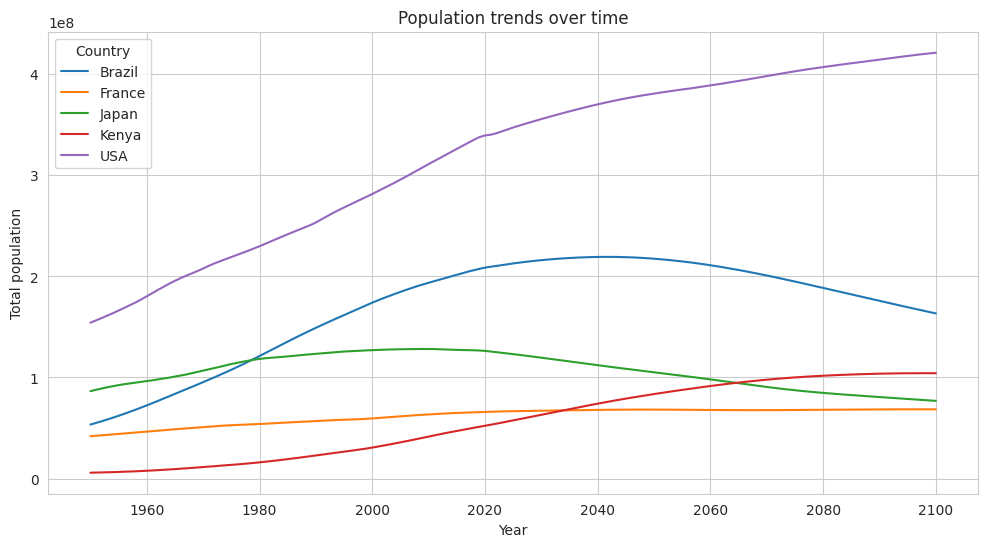

In [19]:
# Plot population trends over time
plt.figure(figsize=(12, 6))
for country, yearly_data in yearly_totals.items():
    plt.plot(yearly_data.index, yearly_data.values, label=country)

plt.title('Population trends over time')
plt.xlabel('Year')
plt.ylabel('Total population')
plt.legend(title='Country')
plt.grid(True)
plt.show()

### 1.2 Stacked Bar Chart - Age distribution comparison

This chart compares age distributions for 1950, 1985, and 2020 for Brazil.


Age group populations:
            0-14      15-30      31-45      46-65        66+
1950  107393682   89953725   65442011   58056970   20860463
1985  150052068  153415073  117184681  102564181   49491148
2020  153184937  172621959  160974846  187541597  118200822

Age group population percentages:
            0-14      15-30      31-45      46-65        66+
1950  31.428601  26.324823  19.151507  16.990286   6.104783
1985  26.200488  26.787700  20.461536  17.908661   8.641615
2020  19.328740  21.781287  20.311664  23.663833  14.914476


<Figure size 1000x600 with 0 Axes>

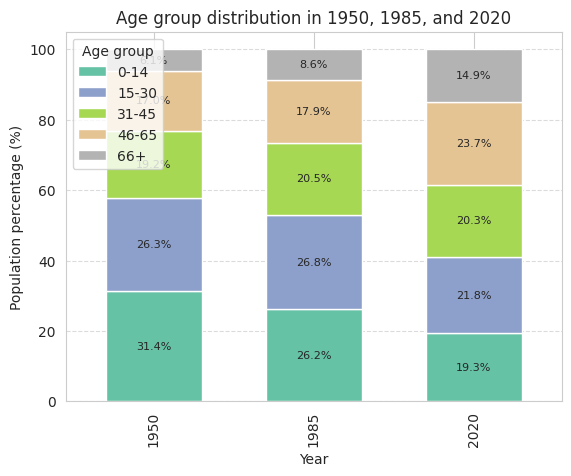

In [20]:
# Define age groups
age_groups = {
    '0-14': list(range(0, 15)),       # Ages 0 to 14
    '15-30': list(range(15, 31)),     # Ages 15 to 30
    '31-45': list(range(31, 46)),     # Ages 31 to 45
    '46-65': list(range(46, 66)),     # Ages 46 to 65
    '66+': list(range(66, 101))       # Ages 66 to 100+
}

# Combine all country data into a single DataFrame
all_countries_df = pd.concat(data.values(), ignore_index=True)

# Filter data for the years 1950, 1985, and 2020
filtered_years = all_countries_df[all_countries_df['year'].isin([1950, 1985, 2020])]

# Initialize a dictionary to store population by age groups and year
age_group_populations = {year: {} for year in [1950, 1985, 2020]}

# Aggregate population for each age group by year
for year, df_year in filtered_years.groupby('year'):
    for group, ages in age_groups.items():
        # Sum population for the current age group
        total_population = df_year[df_year['age'].isin(ages)]['population'].sum()
        age_group_populations[year][group] = total_population

# Convert to DataFrame 
age_group_df = pd.DataFrame(age_group_populations).T
print("\nAge group populations:\n", age_group_df)

# Calculate percentages for each age group within each year
age_group_df_percentage = age_group_df.div(age_group_df.sum(axis=1), axis=0) * 100
print("\nAge group population percentages:\n", age_group_df_percentage)

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
age_group_df_percentage.plot(kind='bar', stacked=True, colormap=plt.cm.Set2, width=0.6)

# Customize plot
plt.title('Age group distribution in 1950, 1985, and 2020')
plt.xlabel('Year')
plt.ylabel('Population percentage (%)')
plt.legend(title="Age group", loc="upper left")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text annotations for each bar segment
for i, (year, row) in enumerate(age_group_df_percentage.iterrows()):
    cumulative = 0
    for age_group, percentage in row.items():
        plt.text(i, cumulative + percentage / 2, f"{percentage:.1f}%", ha='center', va='center', fontsize=8)
        cumulative += percentage

plt.show()

## Part 2: Seaborn Visualizations

### 2.1 Heatmap - Population distribution across age groups and countries

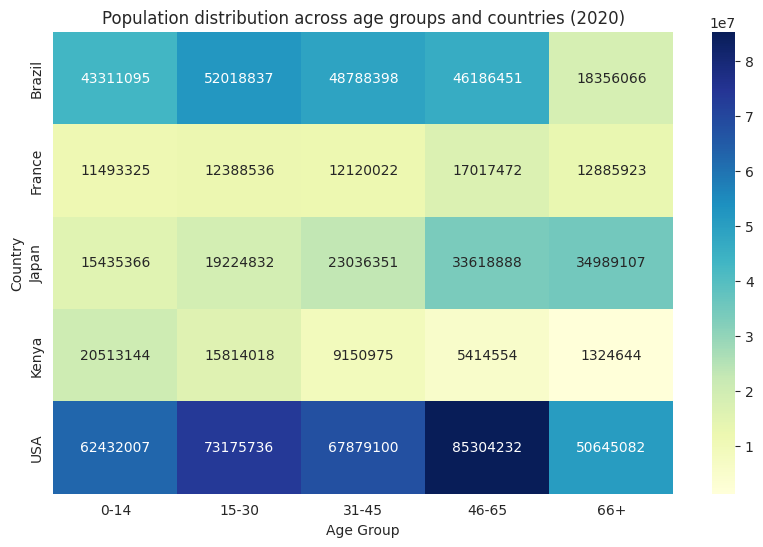

In [21]:
# Set Seaborn style
sns.set_style("whitegrid")

# Choose countries and filter for the year 2020
selected_countries = ['Brazil', 'France', 'Japan', 'Kenya', 'USA']
year = 2020

# Aggregate data for age groups in 2020
age_group_pop = {country: {} for country in selected_countries}
for country in selected_countries:
    df_country = data[country]
    df_2020 = df_country[df_country['year'] == year]
    for group, ages in age_groups.items():
        age_group_pop[country][group] = df_2020[df_2020['age'].isin(ages)]['population'].sum()

# Convert to DataFrame for the heatmap
age_group_df = pd.DataFrame(age_group_pop).T
age_group_df = age_group_df.fillna(0)  # Fill any missing values with 0

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(age_group_df, annot=True, fmt=".0f", cmap="YlGnBu", cbar=True)
plt.title('Population distribution across age groups and countries (2020)')
plt.xlabel('Age Group')
plt.ylabel('Country')
plt.show()

### 2.2 Violin Plot - Age distribution comparison between Japan and United States in 2020

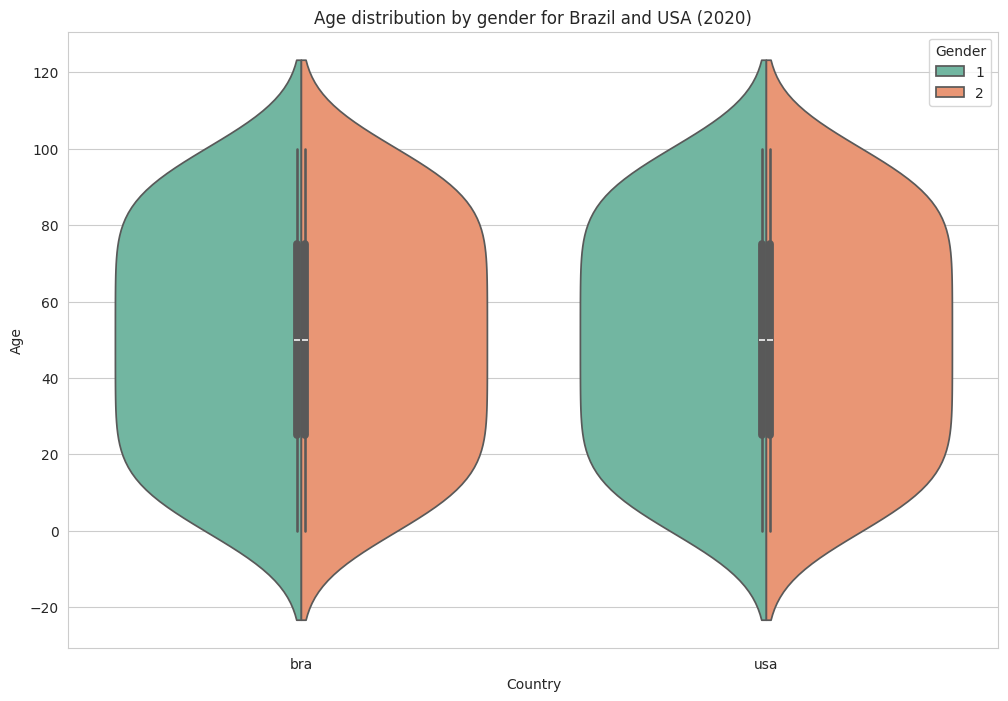

In [22]:
# Choose two countries for comparison
country_1 = 'Brazil'
country_2 = 'USA'
year = 2020

# Filter data for 2020 and the selected countries
df_countries = pd.concat([data[country_1], data[country_2]])
df_2020 = df_countries[df_countries['year'] == year]

# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_2020, x='country', y='age', hue='gender', split=True, palette="Set2")
plt.title('Age distribution by gender for Brazil and USA (2020)')
plt.xlabel('Country')
plt.ylabel('Age')
plt.legend(title="Gender")
plt.show()

### 2.3 Pairplot - Population metrics comparison across selected countries

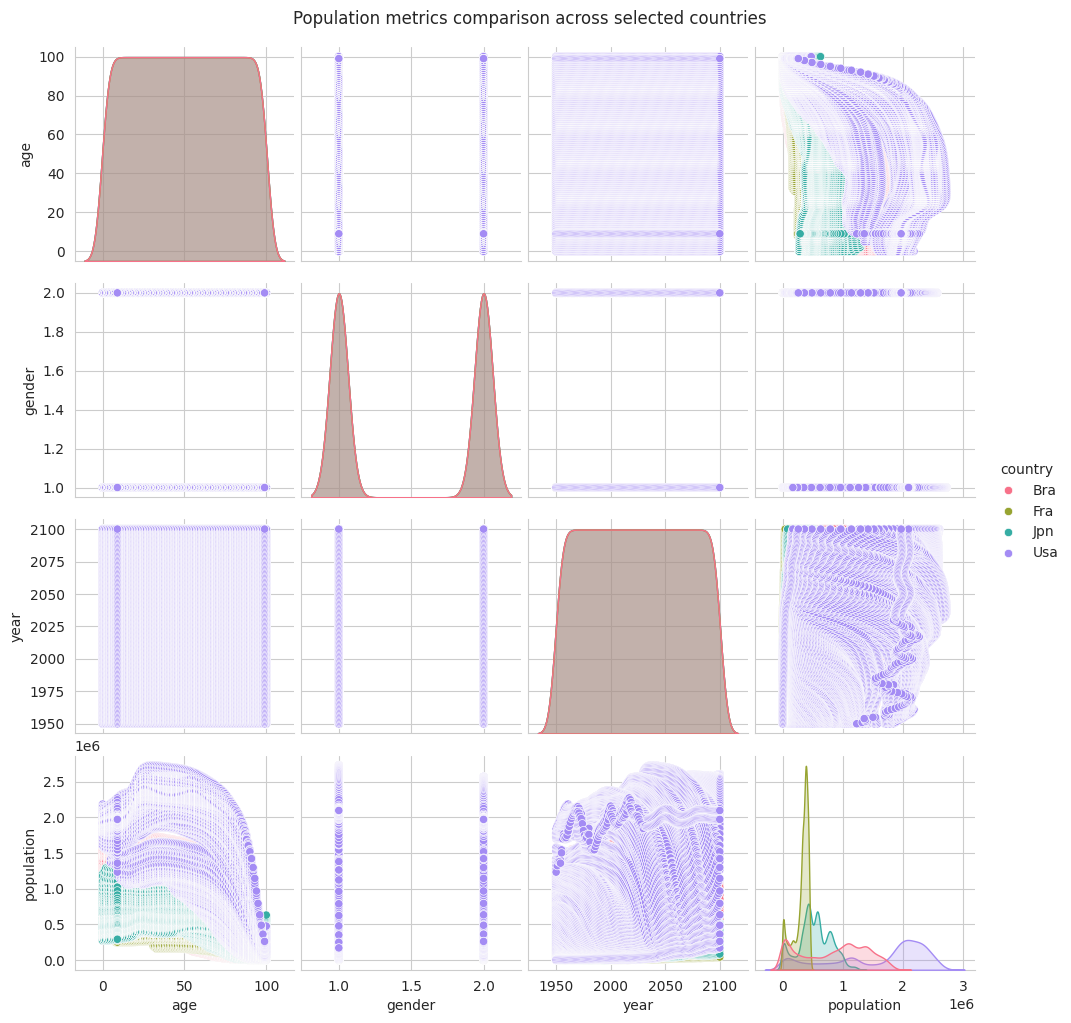

In [23]:
# Choose countries for the pairplot
selected_countries = ['Brazil', 'France', 'Japan', 'USA']
df_selected = pd.concat([data[country] for country in selected_countries])
df_selected['country'] = df_selected['country'].map(lambda x: x.title())  

# Use Seaborn's pairplot to visualize relationships
sns.pairplot(df_selected, hue='country', palette="husl")
plt.suptitle('Population metrics comparison across selected countries', y=1.02)
plt.show()